In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import files
import io
uploaded = files.upload()


Saving diabetes_pima.csv to diabetes_pima.csv


In [ ]:
prima = pd.read_csv("diabetes_pima.csv")
prima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
prima['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

### Information about our Dataset

In [ ]:
prima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### The unique value by columns

In [ ]:
prima.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Explaratory Data Analysis

### Float Variable

In [ ]:
float_var = prima.nunique()[prima.nunique()<3].keys().to_list()
float_var

['Outcome']

### Creation of the function who allowed us to build bar graph

In [ ]:
def bar_plot(v):
    prima[v].value_counts(normalize = True).plot(kind = 'bar')
    plt.ylabel('proportion')
    plt.title('Distribution of' + str(v))
    return plt.show()

### Iteration

In [ ]:
interact(bar_plot, v = float_var);

interactive(children=(Dropdown(description='v', options=('Outcome',), value='Outcome'), Output()), _dom_classe…

In [ ]:
prima['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
int_var = prima.nunique()[prima.nunique()<249].keys().to_list()
int_var

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age',
 'Outcome']

In [ ]:
def histo_plot(v):
    sns.distplot(prima[v], kde=False)
    plt.title('Histogram of'+ v)
    return plt.show()

In [ ]:
interact(histo_plot, v = int_var);

interactive(children=(Dropdown(description='v', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

### We 56,9% who don't have the diabetes
### we have 45,1 % who have the diabetes

### we have the problem of imbalance that we want to solve because could be affection the model of classification that we want to build

### As the minimum age is 21 mean the type of my diabetes is type 2

### Compute the coefficient of symetric  of Age, Pregnancies, SkinThickness, Insulin

In [ ]:
prima['Age'].skew()

1.1295967011444805

In [ ]:
prima['Pregnancies'].skew()

0.9016739791518588

In [ ]:
prima['SkinThickness'].skew()

0.10937249648187608

In [ ]:
prima['Insulin'].skew()

2.272250858431574

### Creation of Boxplot

In [ ]:
def box_plot(v):
    sns.boxplot(prima[v])
    plt.title('Boxplot of'+ v)
    return plt.show()

In [ ]:
interact(box_plot, v = int_var);

interactive(children=(Dropdown(description='v', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

### Je remarque ces variables continues bien qu'il ne presente pas de valeur aberrantes  sont tres asymetriques ce qui peut causer des erreurs au niveau des modeles que nous allons construire.
### J e vais appliquer des fonctions de transformation a ces variables afin de les rendre moins asymetrique.
### Comme je comprend la distribution de chaque variable dans notre jeu de donnee maintennt je vais fais analyse multivariee

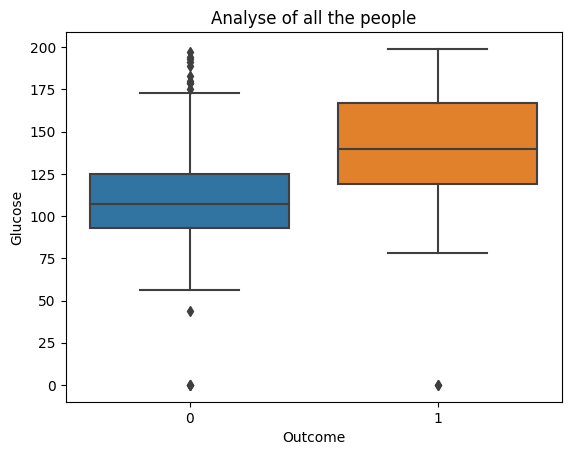

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=prima)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Analyse of all the people')
plt.show()

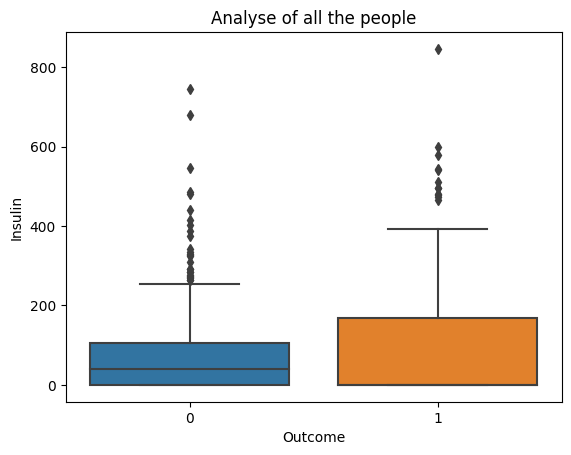

In [ ]:
sns.boxplot(x='Outcome', y='Insulin', data=prima)
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.title('Analyse of all the people')
plt.show()

### On a constate que au fuire et a mesure que le glucose augment dans sang, le nombre de personne ayant le diabete augment mais l'arrive de l'insulin fait baisser le taux de glucose et le nombre de diabetes se reduisent

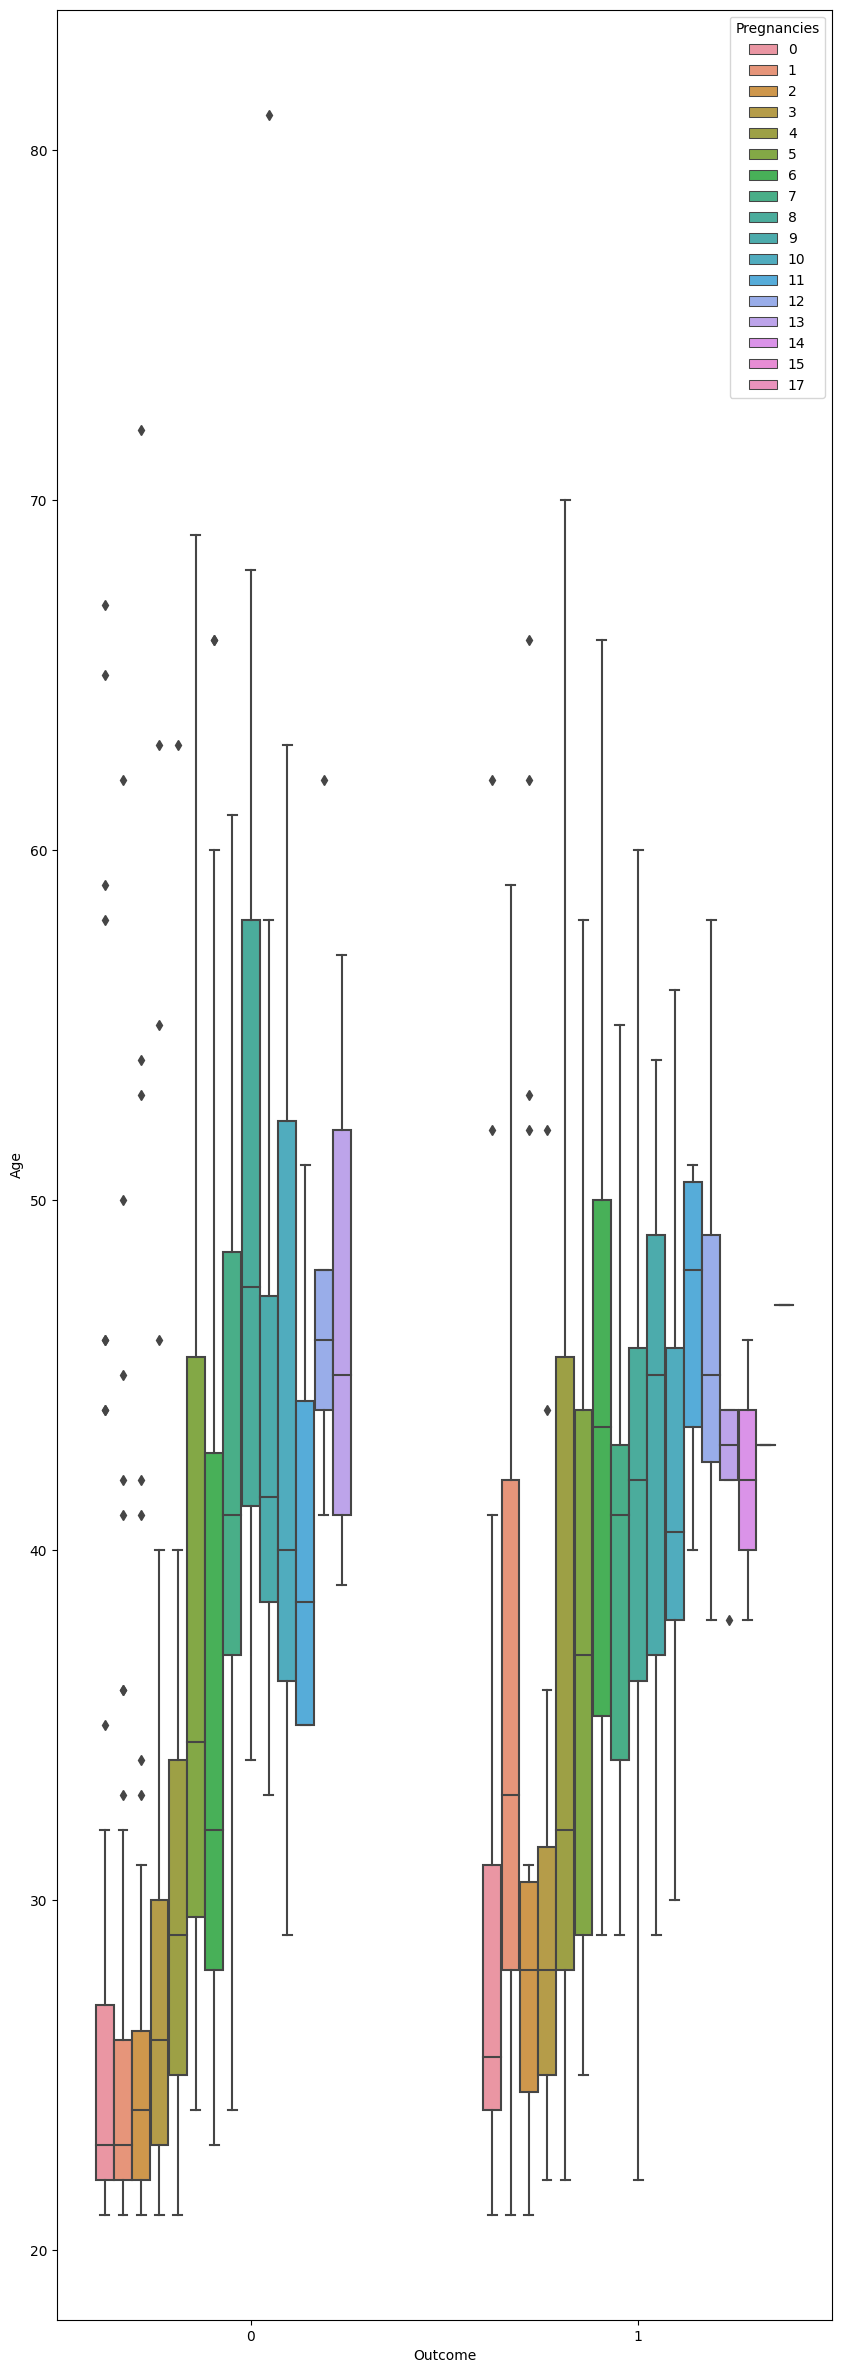

In [ ]:
plt.figure(figsize=(10,30))
sns.boxplot(x='Outcome', y='Age', data=prima, hue = 'Pregnancies');


### Sammary statistics

In [ ]:
prima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Comme tous les varianble ne sont a la meme echelle mais nous allons les normaliser
### Pre-traitement des donnees

In [ ]:
prima_1 = prima.copy()

In [ ]:
prima_1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Transformation des variables asymetric

In [ ]:
prima_1['Age'] = np.sqrt(prima_1['Age'])

In [ ]:
prima_1['Pregnancies'] = np.sqrt(prima_1['Pregnancies'])

In [ ]:
prima_1['SkinThickness'] = np.sqrt(prima_1['SkinThickness'])

In [ ]:
prima_1['Insulin'] = np.sqrt(prima_1['Insulin'])

### Histogramme du variable transformer

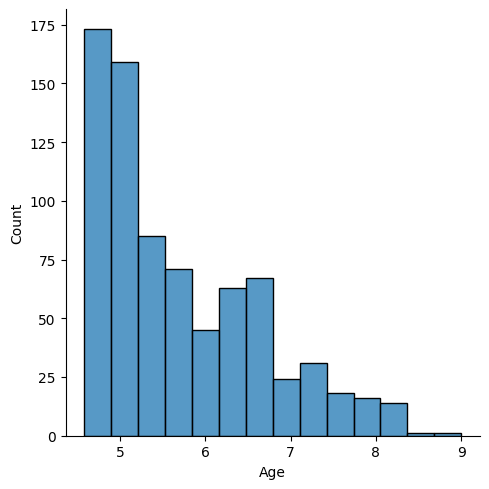

In [ ]:
sns.displot(prima_1['Age'], kde=False)

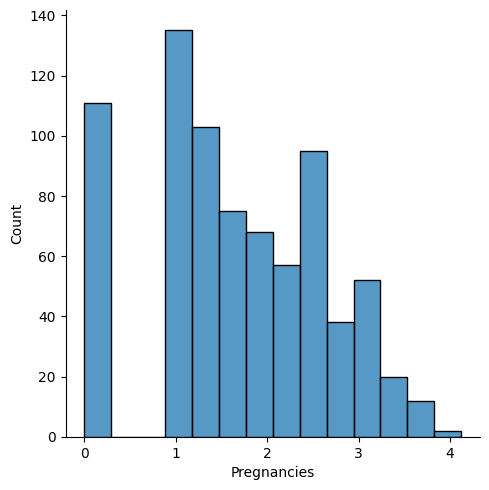

In [ ]:
sns.displot(prima_1['Pregnancies'], kde=False)

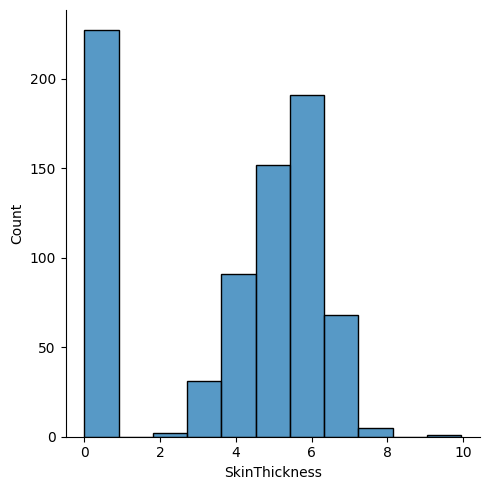

In [ ]:
sns.displot(prima_1['SkinThickness'], kde=False)

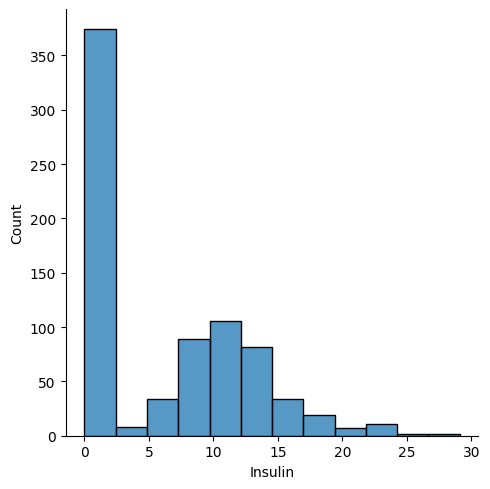

In [ ]:
sns.displot(prima_1['Insulin'], kde=False)

### Compute the coeffience of the asymetrie

In [ ]:
prima_1['Age'].skew()

0.8505983120345812

In [ ]:
prima_1['SkinThickness'].skew()

-0.5734989259853033

In [ ]:
prima_1['Pregnancies'].skew()

-0.15893792070470467

In [ ]:
prima_1['Insulin'].skew()

0.6299554383696059

### Donnees d'entrainement (60%), de validation (20%) et de test(20%)

### Les donnees d'entrainement c'est pour entrainer le model
### Les donnees de validation c'est pour selectionner le meilleur model parce que nous allons utilise plusieur algorithme qui seront entrainer a partir des donnees d'entrainement et formeront des modeles et il faudra selectionner le meilleur
### Les donnees de test vont nous nous permettre de s'assurer de la capaciter de modele a generaliser

In [ ]:
X = prima_1.drop('Outcome', axis = 1)

y = prima_1['Outcome']

seed = 12

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.4, random_state = seed, stratify = y_test)

In [ ]:
y_test.value_counts()

0    81
1    43
Name: Outcome, dtype: int64

### Frequence des classes dans y

In [ ]:
pd.DataFrame(y).value_counts(normalize = True)

Outcome
0          0.651042
1          0.348958
dtype: float64

### Frequence des classes dans y_val

In [ ]:
pd.DataFrame(y_val).value_counts(normalize = True)

Outcome
0          0.652174
1          0.347826
dtype: float64

### Frequence des classes dans y_test

In [ ]:
pd.DataFrame(y_test).value_counts(normalize = True)

Outcome
0          0.653226
1          0.346774
dtype: float64

### Resolution du probleme de desequilibre de classe : Methode de sur echantillonnage de la classe minoritaire

In [ ]:
X2 = X_train

X2['Outcome'] = y_train.values


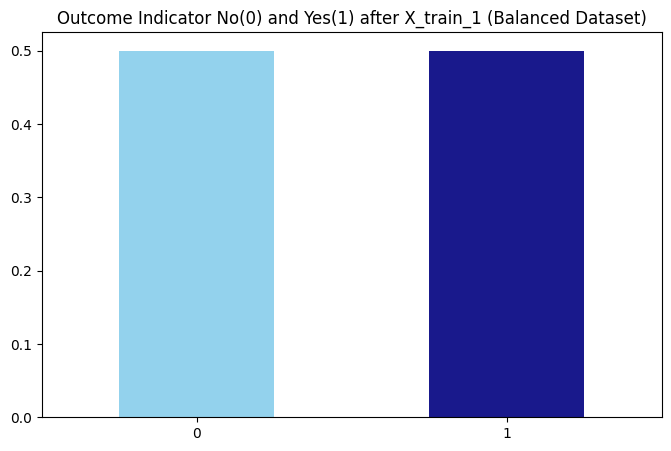

In [ ]:
no = X2[X2.Outcome == 0]
yes = X2[X2.Outcome == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
X_train_1 = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
X_train_1.Outcome.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Outcome Indicator No(0) and Yes(1) after X_train_1 (Balanced Dataset)')
plt.show()

### Verication of class

In [ ]:
X_train_1['Outcome'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

### Donnees d'entrainement sur la base de la methode de sur echantillonnage de la classe minoritaire

In [ ]:
X_train_2 = X_train_1.drop('Outcome', axis = 1)

In [ ]:
y_train_2 = X_train_1['Outcome']

In [ ]:
y_train_2

526    0
76     0
336    0
107    0
65     0
      ..
283    1
663    1
128    1
337    1
231    1
Name: Outcome, Length: 598, dtype: int64

### Resolution du probleme de desequilibre de classe : Methode de sous-echantillonnage de la classe majoritaire

In [ ]:
# majority_downsampled = resample(majority, replace=False, n_samples = len(minority), random_state = seed)
# downsampled = pd.concat([minority, majority_downsampled])
# downsampled

###  Verification

In [ ]:
#downsampled['Outcome'].value_counts(normalize = True)

### Donnees d'entrainement sur la base de la methode de sous-echantillonnage de la classe majoritaire

In [ ]:
# X_train_down = downsampled.drop('Outcome', axis = 1)

# y_train_down = downsampled['Outcome']

### y_train and X_train

In [ ]:
y_train = X_train['Outcome']

In [ ]:
X_train = X_train.drop('Outcome', axis=1)

### Now I have 3 types of training data
### Definition des donnees d'entrainement
### Choix possibles : (X_train, y_train), (X_train_2, y_train_2) et (X_train_down, y_train_down)

In [ ]:
train_features = X_train_2#.copy()

In [ ]:
train_labels = y_train_2#.copy()

In [ ]:
train_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
526,1.000000,97,64,4.358899,9.055385,18.2,0.299,4.582576
76,2.645751,62,78,0.000000,0.000000,32.6,0.391,6.403124
336,0.000000,117,0,0.000000,0.000000,33.8,0.932,6.633250
107,2.000000,144,58,5.291503,11.832160,29.5,0.287,6.082763
65,2.236068,99,74,5.196152,0.000000,29.0,0.203,5.656854


### Comme les variables: Glucose, BloodPressurs ont des valeurs plus important que les autres cela peux causer des bias dans notre modeles du coup nous allons normaliser notre dataset ou la standardiser
### Stardisation c'est la variable mois la moyenne de la viable sur l'ecart type de cette meme variable

### Normalisation des variables independantes des differents ensembles de donnees
### Nous pouvons choisir de standardiser au lieu de normaliser

In [ ]:
scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)


### Retransformation des dataFrames

In [ ]:
train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

### Verification si tous les valeurs sont entre 0 et 1

In [ ]:
train_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.410018,0.625830,0.564477,0.466763,0.219100,0.558227,0.176500,0.287301
std,0.251696,0.165418,0.176801,0.328232,0.234553,0.129263,0.145988,0.231395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242536,0.512563,0.524590,0.000000,0.000000,0.486532,0.075149,0.106958
50%,0.420084,0.613065,0.590164,0.617213,0.216040,0.558923,0.131725,0.229238
75%,0.594089,0.728643,0.655738,0.712697,0.415067,0.638047,0.254483,0.446352
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelisation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(train_features, train_labels)
print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       120
           1       0.72      0.59      0.65        64

    accuracy                           0.78       184
   macro avg       0.76      0.73      0.74       184
weighted avg       0.77      0.78      0.77       184



### Importance des variables independantes

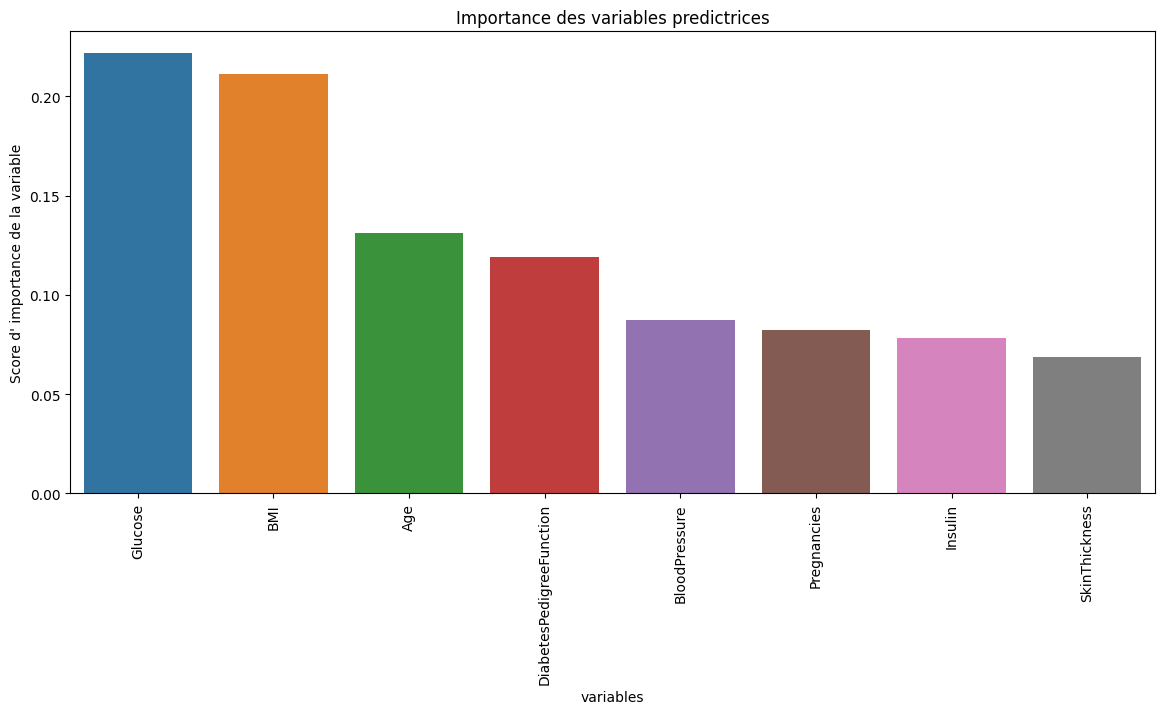

In [ ]:
plt.figure(figsize=(14, 6))
vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

sns.barplot(x = vars_imp.index, y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel('variables')
plt.ylabel("Score d' importance de la variable")
plt.title('Importance des variables predictrices')
plt.show()

In [ ]:
len(train_features.columns)

8

## Modele de regression logistique

### Dictionnaire des hyperparametres

In [ ]:
param_grid = {'C':[0.001, 0.01, 1, 10, 50, 100, 500]}

### Objet GridSearchCV


In [ ]:
grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), param_grid=param_grid,scoring='f1', cv=5)

### Entrainement de l'algorithme

In [ ]:
logreg_model = grid_logreg_class.fit(train_features, train_labels)

### Meilleur Score et meilleur hyperparametre

In [ ]:
print(round(logreg_model.best_score_, 3))

0.73


In [ ]:
print(logreg_model.best_estimator_)

LogisticRegression(C=100, max_iter=500, random_state=12)


### Fonction d'evalution de la performance d'un modele


In [ ]:
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))

### Evaluation du modele de regression logistique

In [ ]:
model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       120
           1       0.66      0.78      0.71        64

    accuracy                           0.78       184
   macro avg       0.76      0.78      0.77       184
weighted avg       0.80      0.78      0.79       184



### Application de l'algorithme RECURSIVE FEATURE ELIMINATOR(RFE) pour voir s'il garge la meme performance lorqu'on reduit le nombre de predicteur : permet de faire la selection des meilleurs variables predictrices: permet de donnee la meilleur performance de mon model

### Creation d'une fonction de construction  d'un modele avec utilisation de l'algorithme RFE

In [ ]:
def model_with_rfe(model):
    rfe_model = RFE(estimator=model, verbose=0)
    rfe_model.fit(train_features, train_labels)
    mask = rfe_model.support_
    reduced_X = train_features.loc[:, mask]
    print(reduced_X.columns)
    return rfe_model

### Logistic Regression RFE

In [ ]:
rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)

rfe_logreg_model

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI'], dtype='object')


RFE(estimator=LogisticRegression(C=100, max_iter=500, random_state=12))

### Evaluation du modele de regression logistique avec RFE

In [ ]:
model_evaluation(rfe_logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       120
           1       0.62      0.73      0.67        64

    accuracy                           0.75       184
   macro avg       0.73      0.75      0.73       184
weighted avg       0.76      0.75      0.75       184



### RFE a reduit  le nombre de prediction de 8 a 4 et que l'accuracy du modele s'est dimunier

### Passons a l'algorithme de foret aleatoire

### Dictionnaire des hyperparametres

In [ ]:
param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000],'max_depth':[3, 5, 10, 20, None]}


### Objet GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid = param_grid_rf,scoring='f1', cv=5)

### Entrainement de l'algorithme

In [ ]:
rf_model = grid_rf_class.fit(train_features, train_labels)

### Meilleur score et meilleur hyperparametre

In [ ]:
print(round(rf_model.best_score_, 3))

0.87


In [ ]:
print(rf_model.best_estimator_)

RandomForestClassifier(max_depth=20, random_state=12)


### Evaluation du modele de foret aleatoire

In [ ]:
model_evaluation(rf_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       120
           1       0.73      0.58      0.64        64

    accuracy                           0.78       184
   macro avg       0.76      0.73      0.74       184
weighted avg       0.77      0.78      0.77       184



### Compare aux valeurs du modele de regression logistique , le modele de foret aleatoire on meme accuracy

### Random Forest avec RFE

In [ ]:
rfe_forest_model = model_with_rfe(rf_model.best_estimator_)

rfe_forest_model

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=20, random_state=12))

### Evaluationdu modele de foret aleatoire avec RFE

In [ ]:
from pandas.core.algorithms import mode
model_evaluation(rfe_forest_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       120
           1       0.67      0.53      0.59        64

    accuracy                           0.74       184
   macro avg       0.72      0.69      0.70       184
weighted avg       0.74      0.74      0.74       184



### Au vu de ces valeur, nous retiendrons le modele de foret aleatoire obtenu sans RFE

### Classification Perceptron multicouche


### MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=seed, max_iter=100)
parameters = {'hidden_layer_sizes':[(50,), (100,), (200,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'learning_rate':['constant', 'invscaling', 'adaptive']}
mlp_cv = GridSearchCV(mlp, parameters, scoring='f1', cv=5, n_jobs=-1)
mlp_cv.fit(train_features, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=12),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

### Meilleur score et meilleur hyperparametre

In [ ]:
round(mlp_cv.best_score_, 3)

0.734

In [ ]:
mlp_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(200,), max_iter=100, random_state=12)

### Evaluation du modele Perceptron

In [ ]:
model_evaluation(mlp_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       120
           1       0.64      0.81      0.72        64

    accuracy                           0.78       184
   macro avg       0.76      0.79      0.77       184
weighted avg       0.80      0.78      0.78       184



### Passons maintenant a un modele SVM(Support Vector Machine)

# Support Vector Machine

## Support Vector Machine : Classifieur qui trouve l'hyperplan optimal qui maximise la frontiere entre 2 classes

In [ ]:
svm_model = SVC(random_state=seed)

svm_hyp = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svm_hyp, scoring='f1', cv=5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))

print(svm_cv.best_estimator_)

0.804
SVC(C=100, random_state=12)


### Evaluation du model SVM

In [ ]:
model_evaluation(svm_cv.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       120
           1       0.59      0.59      0.59        64

    accuracy                           0.72       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.72      0.72      0.72       184



K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(train_features, train_labels)
print('Train score', model.score(train_features, train_labels))
print('Test score', model.score(X_test, y_test))

Train score 0.802675585284281
Test score 0.7016129032258065


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [ ]:
model = grid.best_estimator_

In [ ]:
model.score(X_test, y_test)

0.6451612903225806

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[64, 17],
       [27, 16]])

# Conclusion

In [ ]:
model_evaluation(logreg_model.best_estimator_, X_val, y_val)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       120
           1       0.66      0.78      0.71        64

    accuracy                           0.78       184
   macro avg       0.76      0.78      0.77       184
weighted avg       0.80      0.78      0.79       184



In [ ]:
model_evaluation(logreg_model.best_estimator_, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        81
           1       0.64      0.74      0.69        43

    accuracy                           0.77       124
   macro avg       0.75      0.76      0.75       124
weighted avg       0.78      0.77      0.77       124

